In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor ,GradientBoostingRegressor
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [2]:
import os
os.chdir('C:/Users/Inspiron/Desktop/omkar/Hackathon/Updated Hackathon')

In [45]:
df = pd.read_csv('Train.csv')

In [46]:
df.head()

ID account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  12554      current      M   35          708     24893.00       378.00   
1  17645      current      M   35          123     18941.62       966.00   
2   7604      current      M   55          802      5678.87      2724.00   
3   1590      current      F   29          867     30489.50      1236.00   
4  16556      current      M   34          802      7441.40      6906.04   

   cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  \
0     10288.00     29664.00     16291.40     11432.00           2.0   
1     20672.00       287.00      4217.00       885.00           1.0   
2      1964.50      3933.11     23956.25      5168.00          43.0   
3     12609.88      9138.14     17521.00     13650.30          53.0   
4      4364.00      1939.00      2121.00      6829.18          67.0   

   cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  \
0          26.0          10.0          48.0          14.0          47.0   
1           7.0          13.0           3.0          21.0          31.0   
2          32.0         102.0           4.0           1.0          80.0   
3           1.0          50.0           1.0           1.0          10.0   
4          47.0          82.0          54.0          16.0          68.0   

   card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  \
0  430000.0                   1.0                  1.0                   1.0   
1  127500.0                   1.0                  1.0                   1.0   
2  199999.0                   1.0                  1.0                   1.0   
3  155000.0                   1.0                  1.0                   1.0   
4  297000.0                   1.0                  1.0                   1.0   

   vehicle_loan_closed  investment_1  investment_2  investment_3  \
0                  1.0        593.20       1244.14         787.0   
1                  1.0     213557.15     172678.56       90525.0   
2                  1.0     165907.57     470000.00       25524.0   
3                  1.0      81872.65     223379.40       48500.0   
4                  1.0        568.80     385000.00      183999.0   

   investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  \
0        6885.0          85919.48           25192.00             24.0   
1        1500.0          12255.75           88693.37             35.0   
2        3735.0          34193.00           84880.00             72.0   
3       -4679.0          11558.23          236326.00             43.0   
4        6916.0          17022.81           58897.03             46.0   

   credit_count_apr  max_credit_amount_apr  debit_amount_may  \
0               6.0                25296.0          11527.50   
1              36.0                80750.0          92276.57   
2               9.0                38466.0          19343.00   
3              30.0                52732.0          43867.91   
4              36.0                19613.0         153253.71   

   credit_amount_may  credit_count_may  debit_count_may  \
0          191777.13               2.0             40.0   
1           71162.00               2.0             78.0   
2           70978.00               2.0             82.0   
3           63033.84              23.0             38.0   
4           30286.00              24.0             50.0   

   max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
0                24563.0          30051.32            12761.0   
1                23948.0          42119.05            76206.0   
2                10752.0          58373.25            75283.0   
3                12607.0          69851.51            68708.0   
4                25213.0          10071.00            80140.0   

   credit_count_jun  debit_count_jun  max_credit_amount_jun loan_enq  \
0               2.0             65.0                50836.0        Y   
1              21.0             63.0                23226.0        

In [47]:
df.drop(['emi_active','personal_loan_active','personal_loan_closed','vehicle_loan_active','vehicle_loan_closed','loan_enq'],axis = 1,inplace= True)

In [48]:
df.set_index('ID',inplace= True)

In [7]:
#df['investment_4'] = df['investment_4'].apply(lambda x : -x if (x < 0) else x)

In [49]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

Feature Number of Outliers
0                     age                534
1             region_code                  0
2             cc_cons_apr               1217
3             dc_cons_apr               1220
4             cc_cons_may               1202
5             dc_cons_may               1248
6             cc_cons_jun               1181
7             dc_cons_jun               1366
8            cc_count_apr                883
9            cc_count_may                709
10           cc_count_jun                 49
11           dc_count_apr                434
12           dc_count_may               1233
13           dc_count_jun                  0
14               card_lim                 59
15           investment_1               2123
16           investment_2               1297
17           investment_3               1554
18           investment_4               1004
19       debit_amount_apr               1239
20      credit_amount_apr               1229
21        debit_count_apr                231
22       credit_count_apr                 58
23  max_credit_amount_apr               1376
24       debit_amount_may               1235
25      credit_amount_may               1173
26       credit_count_may               2655
27        debit_count_may                617
28  max_credit_amount_may               1300
29       debit_amount_jun               1164
30      credit_amount_jun               1218
31       credit_count_jun               2217
32        debit_count_jun                  0
33  max_credit_amount_jun               1385
34                cc_cons               3134

In [50]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


dataframe = treat_outliers(df)

# Checking for outliers after applying winsorization
detect_outliers(df)

Feature Number of Outliers
0                     age                  0
1             region_code                  0
2             cc_cons_apr                  0
3             dc_cons_apr                  0
4             cc_cons_may                  0
5             dc_cons_may                  0
6             cc_cons_jun                  0
7             dc_cons_jun                  0
8            cc_count_apr                  0
9            cc_count_may                  0
10           cc_count_jun                  0
11           dc_count_apr                  0
12           dc_count_may                  0
13           dc_count_jun                  0
14               card_lim                  0
15           investment_1               2123
16           investment_2                  0
17           investment_3               1554
18           investment_4                  0
19       debit_amount_apr                  0
20      credit_amount_apr                  0
21        debit_count_apr                  0
22       credit_count_apr                  0
23  max_credit_amount_apr                  0
24       debit_amount_may                  0
25      credit_amount_may                  0
26       credit_count_may               2655
27        debit_count_may                  0
28  max_credit_amount_may                  0
29       debit_amount_jun                  0
30      credit_amount_jun                  0
31       credit_count_jun               2217
32        debit_count_jun                  0
33  max_credit_amount_jun                  0
34                cc_cons               3134

In [43]:
# df['credit_count_jun'] = winsorize(df['credit_count_jun'] , limits=[0.05, 0.15],inclusive=(True, True))
# df['investment_1'] = winsorize(df['investment_1'] , limits=[0.05, 0.15],inclusive=(True, True))
# df['investment_3'] = winsorize(df['investment_3'] , limits=[0.05, 0.12],inclusive=(True, True))
# df['credit_count_may'] = winsorize(df['credit_count_may'] , limits=[0.05, 0.18],inclusive=(True, True))
# df['cc_cons'] = winsorize(df['cc_cons'] , limits=[0.05, 0.21],inclusive=(True, True))

In [51]:
# detect_outliers(df)
df.skew()

age                      0.455764
region_code             -0.190733
cc_cons_apr              0.950307
dc_cons_apr              1.022063
cc_cons_may              0.951935
dc_cons_may              0.988034
cc_cons_jun              0.959841
dc_cons_jun              1.088507
cc_count_apr             1.090164
cc_count_may             0.881148
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             1.155948
dc_count_jun             0.577510
card_lim                 0.069251
investment_1             1.758273
investment_2             0.903871
investment_3             1.403952
investment_4             0.006199
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_apr          0.493456
credit_count_apr         1.004090
max_credit_amount_apr    1.002865
debit_amount_may         0.926990
credit_amount_may        0.910615
credit_count_may         1.482276
debit_count_may          0.577601
max_credit_amount_may    0.942760
debit_amount_j

In [52]:
for col in df.select_dtypes(exclude=object).columns:
    if df[col].skew() > 1:
        df[col] = np.sqrt(df[col])
        print(col, df[col].skew())

dc_cons_apr 0.46331420376216254
dc_cons_jun 0.5345118238996455
cc_count_apr 0.6360417813652102
dc_count_may 0.6894228908405028
investment_1 1.083336900743267
investment_3 0.7321684400688152
credit_count_apr 0.5313410867412536
max_credit_amount_apr 0.5837013057478332
credit_count_may 1.1130569349794515
credit_count_jun 0.883349873754178
cc_cons 1.4023273756849186


In [53]:
X=df.drop('cc_cons',axis=1)
y=df.cc_cons
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
X_train.head()

account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
ID                                                                      
11161      current      M   28          536      2123.80    58.497863   
1356       current      M   53          595      7769.64    49.720720   
2523        saving      M   28          324      8751.85    62.016127   
14843      current      M   62          801     19301.78    44.249294   
17448       saving      M   55          385      7982.54    88.830175   

       cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  \
ID                                                                        
11161      1043.04     16077.96    15137.980    52.325902      6.557439   
1356       4853.00      2354.61    12762.845    78.409183      1.000000   
2523      11166.66      2467.99    15339.780    53.150729      2.449490   
14843      2760.00     11379.10    19843.000    21.534391      3.464102   
17448     10401.57      5282.00     9812.000    57.567352      2.236068   

       cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  \
ID                                                                            
11161          27.0          67.0           1.0      2.449490           2.0   
1356           36.0          30.0          24.0      6.633250           8.0   
2523           34.0          53.0           1.0      2.000000          47.0   
14843          83.0          29.0          35.0      1.414214          17.0   
17448          28.0          30.0           5.0      2.000000          13.0   

       card_lim  investment_1  investment_2  investment_3  investment_4  \
ID                                                                        
11161  378000.0    199.629482     470000.00    300.873728   -6281.37988   
1356    27000.0    407.837786     195506.79    260.768096    5439.00000   
2523    44000.0    183.805196     118976.00     63.245553    9827.00000   
14843  345000.0     78.102497      18300.00    354.966196   -5942.00000   
17448   27000.0     22.940139     358480.64     24.145393    1954.00000   

       debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  \
ID                                                                              
11161          63327.00            7196.00             82.0          5.916080   
1356           20167.22            7196.00             52.0          0.000000   
2523           67783.47          154070.50             20.0          3.316625   
14843          35789.48           37586.62              3.0          1.000000   
17448          31383.60           68223.00             82.0          1.732051   

       max_credit_amount_apr  debit_amount_may  credit_amount_may  \
ID                                                                  
11161             197.230829          66756.23          110030.00   
1356              162.680669          42201.00           67872.00   
2523              169.667322          60203.64           28774.00   
14843             197.032992         115987.90          117696.95   
17448             204.956093          26807.39           10138.00   

       credit_count_may  debit_count_may  max_credit_amount_may  \
ID                                                                
11161          2.645751             82.0                65846.0   
1356           1.000000             20.0                17445.0   
2523           6.557439             82.0                29750.0   
14843          1.732051              8.0                24446.0   
17448          2.449490             14.0               102500.0   

       debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  \
ID                                                                              
11161          57535.98            31701.0          1.414214             65.0   
1356          105447.00            45225.0          4.358899              7.0   
2523           67179.20           141143.0

In [55]:
for col in df.select_dtypes(include ='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [56]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [57]:
tree_predictions = dt.predict(X_test) 

In [58]:
Accuracy = dt.score(X_test,y_test)
print(Accuracy)

-0.9873977909209506


In [59]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [60]:
rmsle(y_test,tree_predictions)

1.004628434993925

In [61]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,tree_predictions)

-0.9873977909209506

In [62]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
from sklearn.linear_model import LinearRegression
import math
from mlxtend.regressor import StackingRegressor
import warnings
warnings.filterwarnings("ignore")

### ` Bagging Regressor`

In [63]:
dt2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=0),n_estimators=20,max_samples=100,random_state=0)
dt2.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=0,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1

In [64]:
y_pred_2 = dt2.predict(X_test)

In [65]:
r2_score(y_test,y_pred_2)

-0.05780059005272076

In [66]:
rmsle(y_test,y_pred_2)

0.8017267468669367

### `Pasting `

In [67]:
dt3 = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,max_samples=100,bootstrap=False,random_state=0,verbose=True)
dt3.fit(X_train,y_train)
dt3.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


-0.02932787383246449

In [68]:
y_pred_3 = dt3.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [69]:
rmsle(y_test,y_pred_3)

0.7985347839575808

### ` Random Forest Regressor`

In [70]:
dt4 = RandomForestRegressor(random_state=9)
dt4.fit(X_train,y_train)
dt4.score(X_test,y_test)

-0.1404417702524079

In [71]:
y_pred_4 =dt4.predict(X_test)

In [72]:
rmsle(y_test,y_pred_3)

0.7985347839575808

In [73]:
feature_import = pd.Series(dict(sorted(dict(zip(X_train,dt4.feature_importances_)).items(),key = lambda x : x[1], reverse =True)))

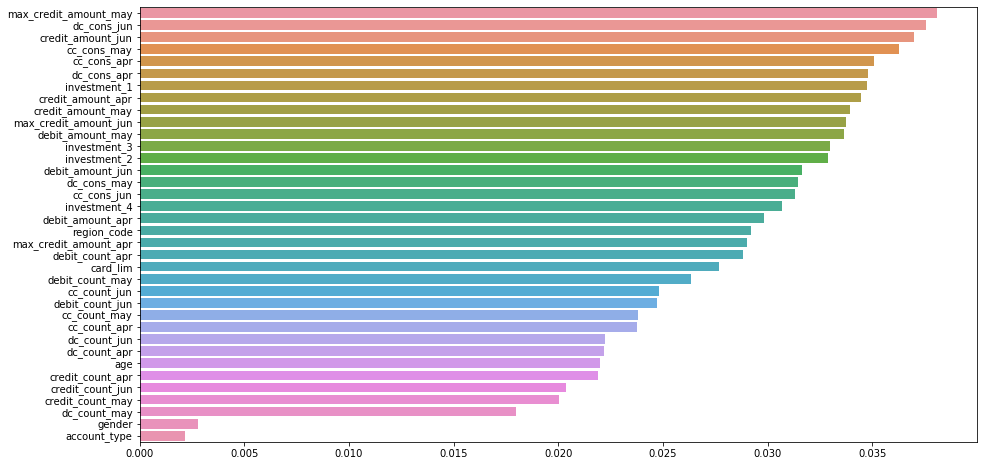

In [31]:
plt.figure(figsize =(15,8))
sns.barplot(y = feature_import.index,x =feature_import.values)

In [74]:
param_grid = {'n_estimators' : [10,20,30],
               'max_depth': [4,6,8],
               'min_samples_split' : [4,6,8]}
clf = RandomForestRegressor(random_state=9)
grid_search = GridSearchCV(clf, param_grid = param_grid,verbose =2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_depth=4, min_samples_split=4, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_split=4, n_estimators=10, total=   0.8s
[CV] max_depth=4, min_samples_split=4, n_estimators=10 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=4, min_samples_split=4, n_estimators=10, total=   0.8s
[CV] max_depth=4, min_samples_split=4, n_estimators=10 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=10, total=   0.8s
[CV] max_depth=4, min_samples_split=4, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=20, total=   1.7s
[CV] max_depth=4, min_samples_split=4, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=20, total=   1.6s
[CV] max_depth=4, min_samples_split=4, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=20, total=   1.7s
[CV] max_depth=4, min_samples_split=4, n_estimators=30 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=30, total=   2.5s
[CV] max_depth=4, min_samples_split=4, n_estimators=30 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=30, total=   2.5s
[CV] max_depth=4, min_samples_split=4, n_estimators=30 ...............
[CV]  

[CV]  max_depth=8, min_samples_split=4, n_estimators=20, total=   3.2s
[CV] max_depth=8, min_samples_split=4, n_estimators=30 ...............
[CV]  max_depth=8, min_samples_split=4, n_estimators=30, total=   4.7s
[CV] max_depth=8, min_samples_split=4, n_estimators=30 ...............
[CV]  max_depth=8, min_samples_split=4, n_estimators=30, total=   4.6s
[CV] max_depth=8, min_samples_split=4, n_estimators=30 ...............
[CV]  max_depth=8, min_samples_split=4, n_estimators=30, total=   4.7s
[CV] max_depth=8, min_samples_split=6, n_estimators=10 ...............
[CV]  max_depth=8, min_samples_split=6, n_estimators=10, total=   1.6s
[CV] max_depth=8, min_samples_split=6, n_estimators=10 ...............
[CV]  max_depth=8, min_samples_split=6, n_estimators=10, total=   1.6s
[CV] max_depth=8, min_samples_split=6, n_estimators=10 ...............
[CV]  max_depth=8, min_samples_split=6, n_estimators=10, total=   1.6s
[CV] max_depth=8, min_samples_split=6, n_estimators=20 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  3.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=9,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8], 'min_

In [75]:
grid_search.score(X_test,y_test)

0.00036729360182363724

In [76]:
grid_search.best_score_

-0.0026552902920350028

In [77]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 30}

In [78]:
model =  grid_search.best_estimator_

In [79]:
model.score(X_test,y_test)

0.00036729360182363724

In [80]:
y_pred_5 = grid_search.predict(X_test)

In [81]:
rmsle(y_test,y_pred_5)

0.7653235114918675